In [1]:
%config Completer.use_jedi = False                                       
import warnings                                                             
warnings.filterwarnings(action="ignore")
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd                                                         
import matplotlib.pyplot as plt                                            
import matplotlib as mpl                                                    
mpl.rcParams['axes.unicode_minus'] = False                                  
#plt.rcParams('font.family') = 'NanumGothicCoding'                          
#plt.rcParams('font.size') = 16                                             
import matplotlib.font_manager as fm
font = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=font, size=16).get_name()
plt.rc('font', family = 'NanumGothicCoding')
plt.rc('font', size = 16)
import seaborn as sns                                                       


Instructions for updating:
non-resource variables are not supported in the long term


***
군집화
***
여러개의 데이터가 있을 때 비슷한 데이터끼리 묶어주는 것을 의미한다.  
비슷한 데이터끼리 묶어놓으면 관리하기 쉽다는 장점이 있다.  
예를 들면 학원을 운영할 때 초급반, 중급반, 고급반으로 적절히 나눠서 분류해서 관리한다면 활용 방안이 많아질 것이다.  

***
머신러닝의 학습 방법은 크게 지도 학습, 비지도 학습, 강화 학습으로 나눌 수 있다.  
- 지도 학습(supervised learning)이란 라벨링이 된 데이터를 학습시키는 것을 의미하고,
- 비지도 학습(unsupervised learning)이란 라벨링이 되지 않은 데이터를 학습시키는 것을 의미하고, 
- 강화 학습(reinforcement learning)이란 시행 착오(reward after try or error)에 통해 데이터를 학습시키는 것을 의미한다.
***

***
라벨링
***
학습(트레이닝) 데이터에 정답(실제값, 관측값, 답, 레이블, 클래스, 타겟)이 표시된 것을 의미한다.  
데이터가 정답을 가지고 있으면 <b>지도 학습</b>, 정답을 가지고 있지 않으면 <b>비지도 학습</b>이라 한다. 
  
비지도 학습 알고리즘은 정답이 없으므로 정확한 방향성이 일치하지 않더라도 알아서 학습이 가능한 알고리즘으로 데이터를 군집화하는 알고리즘이 비지도 학습에 속한다.  
&emsp;-> KMeans 알고리즘이 대표적인 비지도 학습 알고리즘이다.

***
머신러닝 알고리즘을 사용하기 위한 라이브러리를 설치한다.  
conda install scikit-learn

In [2]:
# 군집화(clustering)에 필요한 라이브러리를 import 시킨다.
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('./cluster.csv')
df.head()

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7


In [4]:
# index 속성으로 데이터프레임의 행 인덱스만 얻어올 수 있다.
print(df.index)
print(type(df.index))
print(list(df.index))

RangeIndex(start=0, stop=30, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [5]:
# columns 속성으로 데이터프레임의 열 인덱스(열 이름)만 얻어올 수 있다.
print(df.columns)
print(type(df.columns))

Index(['x', 'y'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [6]:
# values 속성으로 데이터프레임의 데이터만 numpy 배열 형태로 얻어올 수 있다.
print(type(df.values))
print(df.values)
point = df.values #학습할 데이터

<class 'numpy.ndarray'>
[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


***
군집화를 실행할 데이터 시각화
***

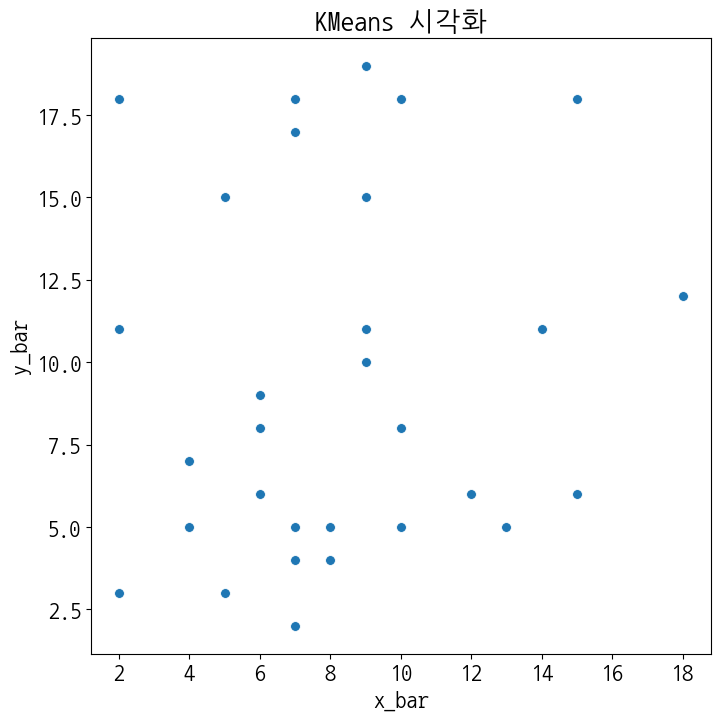

In [7]:
plt.figure(figsize=[8, 8])
sns.scatterplot(df, x = 'x', y = 'y', s = 50)
plt.title('KMeans 시각화')
plt.xlabel('x_bar')
plt.ylabel('y_bar')
plt.show()

***
군집화를 수행하기 위해서는 군집화를 수행할 데이터의 주제를 결정하고 얼마나 많은 군집(cluster)를 만들지 결정한다.  
이때, 데이터가 정확할수록 유리하게 군집화를 할 수 있고, 군집화를 수행하는 방법은 다양한 방법이 있다.  

***
무작위로 cluster의 중심을 선택하고 중심에 가까운 데이터를 cluster에 포함시키는 작업을 반복한 후 무작위로 선택된 cluster의 중심을  
cluster에 포함된 데이터의 중앙으로 이동하는 과정을 반복 수행해서 더이상 cluster 중심의 위치가 변하지 않을때까지 반복하는 것이 일반적인 방법이고,  
이러한 과정을 거치면 완벽하게 군집화된 cluster를 얻을 수 있다.  

<img src="./cluster1.png">

***
군집화를 위한 무작위로 cluster의 중심을 결정하는 방법은 가장 먼저 임의의 노드(데이터)를 선택해서 cluster의 중심으로 설정(파랑)한다.  
그 이후에는 무작위로 cluster의 중심으로 선택된 노드(파랑)에서 가장 거리가 먼 노드(노랑)를 선택해서 두번째 cluster의 중심으로 설정한다.  
그 다음부터는 이미 선택(파랑, 노랑)된 cluster의 중심들로부터 가장 멀리 떨어져있는 노드(녹색)를 선택해서 cluster의 중심으로 선택하는 작업을 반복한다.

***
<img src="./cluster2.png">


위와 같이 cluster의 중심을 선택하는 작업을 했더니 1, 2, 3 세 개의 cluster가 존재한다고 가정하고  
하나의 데이터를 선택해서 세 개의 cluster 중심 중에서 가장 가까운 cluster에 속하도록 만드는 작업을 반복해서 실행한다.  
***
<img src="./cluster3.png">

이러한 과정을 반복해 실행하면 위의 왼쪽 그림과 같을 것이다.  
위의 왼쪽 그림과 같이 대략적으로 군집화가 완료되면 완벽한 군집화를 위해 cluster의 중심 위치를 위의 오른쪽 그림과 같이 군집화된 데이터의 중심으로 이동시킨다.  
cluster의 중심을 이동시키고 다시 모든 데이터에 대해서 어떤 cluster의 중심에 가까운지 하나씩 체크해서 만약 특정 데이터가 다른 cluster의 중심에 더 가깝다면  
그 cluster에 속하도록 설정하는 작업을 반복한다.  
  
cluster 중심의 위치가 더이상 바뀌지 않는다면 군집화가 끝난 것이다.


***
KMeans 알고리즘을 이용해서 cluster를 4개를 생성한다.

In [8]:
# sklearn 라이브러리의 KMeans 알고리즘을 이용해서 모델을 만들고 학습시킨다.
#n_clusters는 군집화할 cluster의 갯수를 지정하는 하이퍼 파라미터이다.
#fit() 메소드의 인수로 학습할 데이터를 넣어서 모델을 학습시킨다.
kmeans = KMeans(n_clusters=4).fit(point)
print(kmeans)

# cluster_centers_ 속성으로 군집화된 cluster의 중심 위치를 얻어온다. 
print(kmeans.cluster_centers_)

# labels_ 속성으로 각각의 데이터가 군집화된 cluster를 얻어온다.
print(kmeans.labels_)

KMeans(n_clusters=4)
[[ 7.         17.14285714]
 [11.14285714  7.28571429]
 [ 5.53846154  5.53846154]
 [15.66666667 13.66666667]]
[2 2 0 2 2 2 0 2 2 2 2 2 2 0 0 2 2 1 1 0 0 1 1 0 1 1 3 1 3 3]


***
데이터프레임에 cluster라는 파생 변수를 추가하고 군집화된 결과를 넣어준다.
***

In [9]:
df['cluster'] = kmeans.labels_
#df.to_csv('./df_clustered.csv', index=False)

***
클러스터링된 결과를 시각화 한다.
***

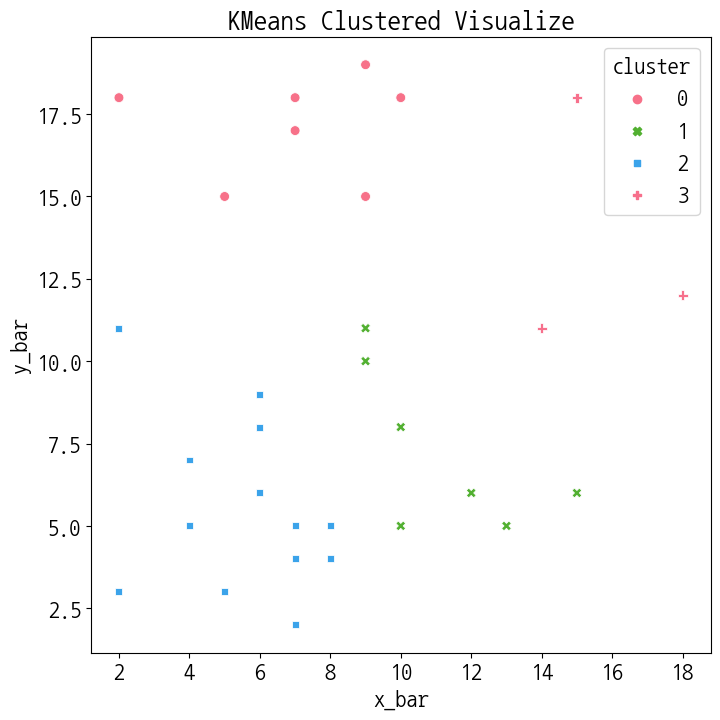

In [10]:
plt.figure(figsize=[8, 8])
#palette 속성으로 시각화되는 데이터의 색상을 변경할 수 있다.
#style 속성을 지정하면 시각화되는 데이터의 모양을 서로 다르게 변경할 수 있다.
sns.scatterplot(df, x = 'x', y = 'y', s = 50, hue='cluster', palette='husl', style='cluster')
plt.title('KMeans Clustered Visualize')
plt.xlabel('x_bar')
plt.ylabel('y_bar')
plt.show()

<img src="./seaborn_palette.png" width=800>